In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

merge_data = pd.read_csv('data_sources/merge_data.csv')

In [2]:
merge_data2 = merge_data.copy()
merge_data2['join_on_year'] = merge_data2['Year'] + 1
merge_data2.head()

,Unnamed: 0,Zip,City,County,Type,Area,Value,Year,Total-Population,Hispanic,White,Black,Native,Asian,Other,Total,Diversity Index,join_on_year
0,0,76574,Taylor,Williamson County,Rural,North,106847.78,2011,17213,35.3,54.0,8.6,0.0,1.8,0.3,100.0,0.576062,2012
1,1,76574,Taylor,Williamson County,Rural,North,106776.56,2012,17775,34.5,53.6,8.9,0.0,2.0,1.0,100.0,0.585258,2013
2,2,76574,Taylor,Williamson County,Rural,North,107119.61,2013,18037,36.8,51.1,9.8,0.0,0.2,2.2,100.1,0.593363,2014
3,3,76574,Taylor,Williamson County,Rural,North,107849.07,2014,18135,35.3,51.9,9.9,0.0,0.4,2.5,100.0,0.595588,2015
4,4,76574,Taylor,Williamson County,Rural,North,109096.49,2015,18281,41.4,46.0,9.6,0.1,0.7,2.1,99.9,0.607297,2016


In [3]:
merge_data3 = merge_data2[['Zip','join_on_year','Value','Diversity Index']]
merge_data3.head()

,Zip,join_on_year,Value,Diversity Index
0,76574,2012,106847.78,0.576062
1,76574,2013,106776.56,0.585258
2,76574,2014,107119.61,0.593363
3,76574,2015,107849.07,0.595588
4,76574,2016,109096.49,0.607297


In [4]:
merge_data4 = pd.merge(merge_data, merge_data3, left_on = ["Zip", "Year"], right_on = ["Zip", "join_on_year"], suffixes = ["","_Prior"])
merge_data4 = merge_data4.drop(["join_on_year"], axis=1)
merge_data4["value_rate"] = merge_data4["Value"]/merge_data4["Value_Prior"] -1
merge_data4["DI_rate"] = merge_data4["Diversity Index"]/merge_data4["Diversity Index_Prior"] -1
merge_data4.head()


,Unnamed: 0,Zip,City,County,Type,Area,Value,Year,Total-Population,Hispanic,...,Black,Native,Asian,Other,Total,Diversity Index,Value_Prior,Diversity Index_Prior,value_rate,DI_rate
0,1,76574,Taylor,Williamson County,Rural,North,106776.56,2012,17775,34.5,...,8.9,0.0,2.0,1.0,100.0,0.585258,106847.78,0.576062,-0.000667,0.015964
1,2,76574,Taylor,Williamson County,Rural,North,107119.61,2013,18037,36.8,...,9.8,0.0,0.2,2.2,100.1,0.593363,106776.56,0.585258,0.003213,0.013849
2,3,76574,Taylor,Williamson County,Rural,North,107849.07,2014,18135,35.3,...,9.9,0.0,0.4,2.5,100.0,0.595588,107119.61,0.593363,0.006810,0.003750
3,4,76574,Taylor,Williamson County,Rural,North,109096.49,2015,18281,41.4,...,9.6,0.1,0.7,2.1,99.9,0.607297,107849.07,0.595588,0.011566,0.019660
4,5,76574,Taylor,Williamson County,Rural,North,111104.17,2016,18502,35.4,...,11.2,0.1,0.8,3.2,100.0,0.618002,109096.49,0.607297,0.018403,0.017627


In [5]:
merge_data4["Type"].value_counts()

Suburban    276
Rural        78
Urban        78
Name: Type, dtype: int64

In [6]:
merge_data4.describe()

,Unnamed: 0,Zip,Value,Year,Total-Population,Hispanic,White,Black,Native,Asian,Other,Total,Diversity Index,Value_Prior,Diversity Index_Prior,value_rate,DI_rate
count,432.00000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,252.00000,78669.972222,213194.252986,2014.500000,25588.460648,28.594907,57.770602,6.763657,0.201389,4.693519,1.976389,100.000463,0.490323,210313.269120,0.485694,0.014075,0.016838
std,145.65694,255.621746,102479.078655,1.709805,17689.118740,18.211530,21.651232,6.958731,0.290608,4.691549,0.997583,0.077966,0.134299,101334.277139,0.137455,0.008490,0.085326
min,1.00000,76574.000000,58555.210000,2012.000000,2799.000000,3.400000,7.700000,0.000000,0.000000,0.000000,0.000000,99.800000,0.081061,57609.440000,0.081061,-0.005388,-0.250303
25%,126.50000,78647.250000,137403.407500,2013.000000,12438.500000,13.775000,43.675000,1.600000,0.000000,0.900000,1.300000,100.000000,0.398576,134876.840000,0.394106,0.007689,-0.012583
50%,252.00000,78719.000000,180989.815000,2014.500000,21056.500000,22.350000,61.800000,4.350000,0.100000,2.850000,1.900000,100.000000,0.517575,178668.425000,0.517246,0.013371,0.005562
75%,377.50000,78738.250000,266798.732500,2016.000000,32363.000000,41.050000,75.325000,9.900000,0.300000,7.625000,2.600000,100.000000,0.587018,264520.180000,0.583612,0.019149,0.029919
max,503.00000,78957.000000,601979.760000,2017.000000,85450.000000,76.700000,95.800000,40.000000,4.200000,24.600000,5.900000,100.200000,0.748330,588975.420000,0.748330,0.048712,1.002732


In [7]:
merge_data4["value_rate_expected"] = 0.0000000001
merge_data4["DI_rate_expected"] = 0.0000000001
merge_data4.head()

,Unnamed: 0,Zip,City,County,Type,Area,Value,Year,Total-Population,Hispanic,...,Asian,Other,Total,Diversity Index,Value_Prior,Diversity Index_Prior,value_rate,DI_rate,value_rate_expected,DI_rate_expected
0,1,76574,Taylor,Williamson County,Rural,North,106776.56,2012,17775,34.5,...,2.0,1.0,100.0,0.585258,106847.78,0.576062,-0.000667,0.015964,1.000000e-10,1.000000e-10
1,2,76574,Taylor,Williamson County,Rural,North,107119.61,2013,18037,36.8,...,0.2,2.2,100.1,0.593363,106776.56,0.585258,0.003213,0.013849,1.000000e-10,1.000000e-10
2,3,76574,Taylor,Williamson County,Rural,North,107849.07,2014,18135,35.3,...,0.4,2.5,100.0,0.595588,107119.61,0.593363,0.006810,0.003750,1.000000e-10,1.000000e-10
3,4,76574,Taylor,Williamson County,Rural,North,109096.49,2015,18281,41.4,...,0.7,2.1,99.9,0.607297,107849.07,0.595588,0.011566,0.019660,1.000000e-10,1.000000e-10
4,5,76574,Taylor,Williamson County,Rural,North,111104.17,2016,18502,35.4,...,0.8,3.2,100.0,0.618002,109096.49,0.607297,0.018403,0.017627,1.000000e-10,1.000000e-10


In [8]:
len(merge_data4)

432

In [9]:
# The degree of freedom is 432-1 = 431
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 431)
critical_value

480.40265297119686

In [10]:
# Run the chi square test with stats.chisquare()
stats.chisquare(merge_data4['value_rate'], merge_data4['value_rate_expected'])

Power_divergenceResult(statistic=1166462740.4762897, pvalue=0.0)

In [11]:
# Run the chi square test with stats.chisquare()
stats.chisquare(merge_data4['DI_rate'], merge_data4['DI_rate_expected'])

Power_divergenceResult(statistic=32603818810.879433, pvalue=0.0)

In [12]:
df=merge_data4[merge_data4["Zip"] == 78613][["value_rate","DI_rate"]].corr(method ='pearson')

In [13]:
df

,value_rate,DI_rate
value_rate,1.00000,0.72805
DI_rate,0.72805,1.00000


In [14]:
df.iloc[0,1]

0.7280501200614788

In [15]:
merge_data4[merge_data4["Zip"] == 78754][["value_rate","DI_rate"]].corr(method ='pearson').iloc[0,1]

-0.8731019438586477

In [16]:
ZIP_codes = merge_data4["Zip"].unique()
ZIP_codes

array([76574, 78602, 78610, 78612, 78613, 78617, 78619, 78620, 78621,
       78626, 78628, 78633, 78634, 78640, 78641, 78642, 78644, 78645,
       78648, 78652, 78653, 78655, 78659, 78660, 78664, 78665, 78666,
       78669, 78676, 78681, 78701, 78702, 78703, 78704, 78705, 78717,
       78721, 78722, 78723, 78724, 78725, 78726, 78727, 78728, 78729,
       78730, 78731, 78732, 78733, 78734, 78735, 78736, 78737, 78738,
       78739, 78741, 78744, 78745, 78746, 78747, 78748, 78749, 78750,
       78751, 78752, 78753, 78754, 78756, 78757, 78758, 78759, 78957],
      dtype=int64)

In [17]:
coor_list = []
for x in ZIP_codes:
    coor_list.append( merge_data4[merge_data4["Zip"] == x][["value_rate","DI_rate"]].corr(method ='pearson').iloc[0,1])
    
    

In [18]:
Zip_Corr = pd.merge(pd.DataFrame({"Zip": ZIP_codes}), merge_data4[["Zip","City","County","Type","Area"]].drop_duplicates(keep='first'), on = ["Zip"], suffixes = ["","_y"])

Zip_Corr["pearson_corr"] = coor_list
Zip_Corr["abs_pearson_corr"] = abs(Zip_Corr["pearson_corr"])

Zip_Corr.sort_values("abs_pearson_corr", ascending=False).head(10)


,Zip,City,County,Type,Area,pearson_corr,abs_pearson_corr
45,78730,Austin,Travis County,Suburban,West,0.938334,0.938334
62,78750,Austin,Travis County,Suburban,West,0.920447,0.920447
66,78754,Austin,Travis County,Suburban,North,-0.873102,0.873102
53,78738,Bee Cave,Travis County,Suburban,West,-0.869909,0.869909
8,78621,Elgin,Bastrop County,Rural,East,0.869364,0.869364
2,78610,Buda,Hays County,Suburban,South,-0.857325,0.857325
58,78746,Austin,Travis County,Suburban,West,-0.853612,0.853612
28,78676,Wimberley,Hays County,Rural,South,-0.834747,0.834747
14,78641,Leander,Williamson County,Suburban,North,-0.802381,0.802381
49,78734,Lakeway,Travis County,Suburban,West,-0.801118,0.801118


In [19]:
merge_data5 = pd.merge(merge_data4, Zip_Corr[["Zip","pearson_corr","abs_pearson_corr"]], on = ["Zip"], suffixes = ["","_y"])
merge_data5.head(10)

,Unnamed: 0,Zip,City,County,Type,Area,Value,Year,Total-Population,Hispanic,...,Total,Diversity Index,Value_Prior,Diversity Index_Prior,value_rate,DI_rate,value_rate_expected,DI_rate_expected,pearson_corr,abs_pearson_corr
0,1,76574,Taylor,Williamson County,Rural,North,106776.56,2012,17775,34.5,...,100.0,0.585258,106847.78,0.576062,-0.000667,0.015964,1.000000e-10,1.000000e-10,-0.589558,0.589558
1,2,76574,Taylor,Williamson County,Rural,North,107119.61,2013,18037,36.8,...,100.1,0.593363,106776.56,0.585258,0.003213,0.013849,1.000000e-10,1.000000e-10,-0.589558,0.589558
2,3,76574,Taylor,Williamson County,Rural,North,107849.07,2014,18135,35.3,...,100.0,0.595588,107119.61,0.593363,0.006810,0.003750,1.000000e-10,1.000000e-10,-0.589558,0.589558
3,4,76574,Taylor,Williamson County,Rural,North,109096.49,2015,18281,41.4,...,99.9,0.607297,107849.07,0.595588,0.011566,0.019660,1.000000e-10,1.000000e-10,-0.589558,0.589558
4,5,76574,Taylor,Williamson County,Rural,North,111104.17,2016,18502,35.4,...,100.0,0.618002,109096.49,0.607297,0.018403,0.017627,1.000000e-10,1.000000e-10,-0.589558,0.589558
5,6,76574,Taylor,Williamson County,Rural,North,113822.62,2017,18939,40.3,...,100.1,0.605445,111104.17,0.618002,0.024468,-0.020319,1.000000e-10,1.000000e-10,-0.589558,0.589558
6,8,78602,Bastrop,Bastrop County,Rural,East,115852.60,2012,25594,23.3,...,100.0,0.520818,115163.33,0.509779,0.005985,0.021654,1.000000e-10,1.000000e-10,-0.106039,0.106039
7,9,78602,Bastrop,Bastrop County,Rural,East,116555.39,2013,26278,26.0,...,99.9,0.542097,115852.60,0.520818,0.006066,0.040857,1.000000e-10,1.000000e-10,-0.106039,0.106039
8,10,78602,Bastrop,Bastrop County,Rural,East,117725.46,2014,25444,26.5,...,100.1,0.540397,116555.39,0.542097,0.010039,-0.003136,1.000000e-10,1.000000e-10,-0.106039,0.106039
9,11,78602,Bastrop,Bastrop County,Rural,East,119269.74,2015,25855,27.8,...,100.0,0.532166,117725.46,0.540397,0.013118,-0.015231,1.000000e-10,1.000000e-10,-0.106039,0.106039


In [20]:
Zip_Corr[Zip_Corr["Type"] == 'Suburban'].sort_values("abs_pearson_corr", ascending=False).head(5)

,Zip,City,County,Type,Area,pearson_corr,abs_pearson_corr
45,78730,Austin,Travis County,Suburban,West,0.938334,0.938334
62,78750,Austin,Travis County,Suburban,West,0.920447,0.920447
66,78754,Austin,Travis County,Suburban,North,-0.873102,0.873102
53,78738,Bee Cave,Travis County,Suburban,West,-0.869909,0.869909
2,78610,Buda,Hays County,Suburban,South,-0.857325,0.857325


In [21]:
Zip_Corr[Zip_Corr["Type"] == 'Urban'].sort_values("abs_pearson_corr", ascending=False).head(5)

,Zip,City,County,Type,Area,pearson_corr,abs_pearson_corr
33,78704,Austin,Travis County,Urban,Central,0.798067,0.798067
30,78701,Austin,Travis County,Urban,Central,-0.686365,0.686365
68,78757,Austin,Travis County,Urban,Central,0.497914,0.497914
31,78702,Austin,Travis County,Urban,Central,0.383744,0.383744
32,78703,Austin,Travis County,Urban,Central,-0.302771,0.302771


In [22]:
Zip_Corr[Zip_Corr["Type"] == 'Rural'].sort_values("abs_pearson_corr", ascending=False).head(5)

,Zip,City,County,Type,Area,pearson_corr,abs_pearson_corr
8,78621,Elgin,Bastrop County,Rural,East,0.869364,0.869364
28,78676,Wimberley,Hays County,Rural,South,-0.834747,0.834747
18,78648,Luling,Caldwell County,Rural,South,0.748637,0.748637
3,78612,Cedar Creek,Bastrop County,Rural,East,-0.745204,0.745204
7,78620,Dripping Springs,Hays County,Rural,South,0.692368,0.692368


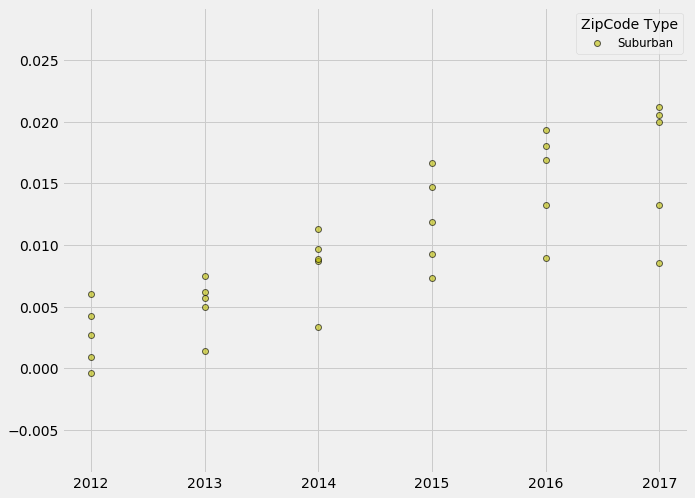

In [29]:
plt.rcParams['figure.figsize']=(10,8) # set the figure size
plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme
plt.grid()
marker_factor = 1000

suburban_x_axis = merge_data5[(merge_data5["Type"] == 'Suburban') & (merge_data5["Zip"].isin([78730,78750,78754,78738,78610]))]["Year"].values
suburban_y_axis = merge_data5[(merge_data5["Type"] == 'Suburban') & (merge_data5["Zip"].isin([78730,78750,78754,78738,78610]))]["value_rate"].values
suburban_DI = merge_data5[(merge_data5["Type"] == 'Suburban') & (merge_data5["Zip"].isin([78730,78750,78754,78738,78610]))]["DI_rate"].values * marker_factor

suburban_handle = plt.scatter(suburban_x_axis, suburban_y_axis, marker="o", facecolors ="y", edgecolors="black", linewidths = 1, alpha = .6, label = "Suburban")

# plt.xlim(2,40.5)
# plt.ylim(18.5,44)
# plt.title("Property value and Diversity Index Rate Change")
# plt.xlabel("Year")
# plt.ylabel("Median Property Value Rate Charge YoY ($)")
lgnd = plt.legend(loc = "best", title = "ZipCode Type", fontsize = "small")
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[1]._sizes = [30]
# lgnd.legendHandles[2]._sizes = [30]
# plt.text(42,37,'Note:')
# plt.text(42,35.5,'Circle size correlates with driver count per city.')
plt.grid()

plt.savefig("images/06-01-agustin-scatter.png")
plt.show()